# Time Series Decomposition


## Introduction

Understanding your time series is fundamental when trying to gain insight and finding the best model to produce future forecasts. Most time series can be broken up into different components to help diagnose it in a structured way providing a powerful analysis tool.

## Time Series Components


Time series are a combination of (mainly) three components: Trend, Seasonality and Residuals/Remainder. Let's break each of these down.

**Trend**: This is the overall motion of the series. It may be consistently increasing overtime, decreasing overtime or a combination of both.

**Seasonality**: Any regular seasonal pattern in the series. For example, ice cream sales are regularly higher in summer than winter.

**Residual/Remainder**: This is the bit that is left over after we take into account the trend and seasonality. It can also be thought of as just statistical noise.

## Additive vs Multiplicative Model


For an additive model we have:

$$
y(t) = T(t) + S(t) + R(t)
$$

And for a multiplicative series:

$$
y(T) = T(t) \times S(t) \times R(t)
$$

Where Y is the series, T is the trend, S is the seasonality and R is the residual component.

The additive model is most appropriate when the size of the series’ variations are on a consistent numerical scale. On the other hand, the multiplicative model is when the series’ fluctuations are on a relative scale.

For example, if the ice cream sales are higher in summer by 1,000 every year, then the model is additive. If the sales are higher by a consistent 20% every summer, but the absolute number of sales are changing, then the model is multiplicative. 

It is possible to convert a multiplicative model to an additive one by simply taking the log transfrom or the Box-Cox transform:

$$
ln(y(t)) = ln(T(t)) + ln(S(t)) + ln(R(t))
$$

## How is Decomposition Done?

There are multiple algorithms and methods to decompose the time series into the three components. I want to go over the classical approach as this is frequently used and is quite intuitive.

- Compute the trend component, T, using a moving/rolling average.

- De-trend the series, Y-T for additive model and Y/T for multiplicative model.

- Compute the seasonal component, S, by taking the average of the de-trended series for each season.
- The residual component, R, is calculated as: R = Y-T-R for additive model and R = Y/(TR) for multiplicative model.

There are also several other methods available for decomposition such as STL, X11 and SEATS. These are advanced methods and add to the basic approach from the classical method and improve upon its shortcomings.

## Python Example

In [16]:
# Import packaged
import plotly.express as px
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import kagglehub

In [17]:

import matplotlib.pyplot as plt

def plotting(title, data, x, y, x_label, y_label):
    """General function to plot the passenger data (Matplotlib version)."""
    data[x] = pd.to_datetime(data['Month'])
    plt.figure(figsize=(6, 4))
    plt.plot(data[x], data[y])
    plt.title(title)

    #plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

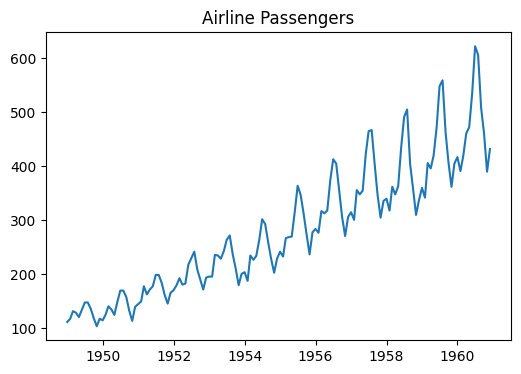

In [18]:

# Read in the data
path = kagglehub.dataset_download("ashfakyeafi/air-passenger-data-for-time-series-analysis")
data = pd.read_csv(path + "/AirPassengers.csv")
# Read in the data
#data.index = pd.to_datetime(data.index)

# Plot the data using the plotting function

plotting('Airline Passengers', data, 'Month', '#Passengers', 'Date', 'Passengers')


From this plot we observe an increasing trend and a yearly seasonality. Notice that the size of the fluctuations are increasing through time, therefore we have a multiplicative model.


### Muliplicative 

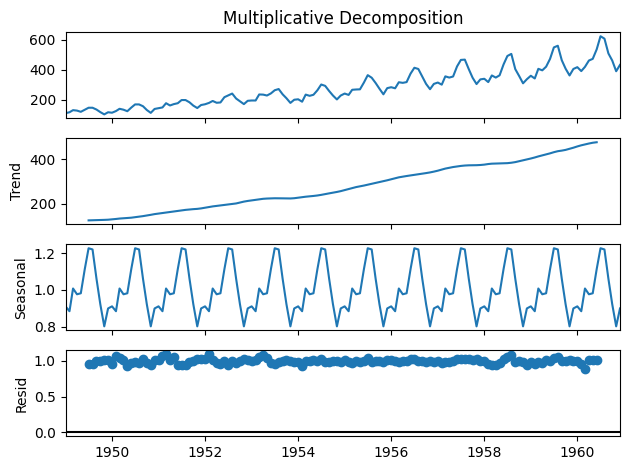

In [19]:
data.index = pd.to_datetime(data['Month'])
# Plot the decomposition for multiplicative series
data.rename(columns={'#Passengers': 'Multiplicative Decomposition'}, inplace=True)
decomposition_plot_multi = seasonal_decompose(data['Multiplicative Decomposition'],
                                              model='multiplicative')
decomposition_plot_multi.plot()
plt.show()

From the plot above we can see that the function has indeed successfully captured the three components.

### Additive 

We can convert our series to an additive model by stabilising the variance using the Box-Cox transform by applying the boxcox Scipy function:

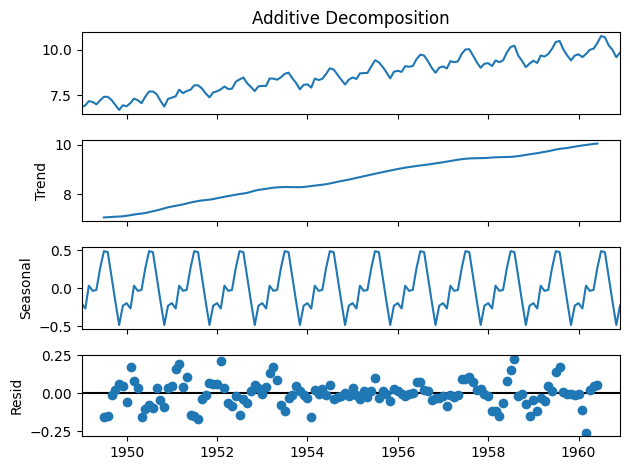

In [20]:
# Apply boxcox to acquire additive model
data['Additive Decomposition'], lam = boxcox(data['Multiplicative Decomposition'])

# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(data['Additive Decomposition'],
                                            model='additive')
decomposition_plot_add.plot()
plt.show()

Again, the function seems to have captured the three components well. Interestingly, we see the residuals having a higher volatility in the earlier and later years. This may be something to take into account when building a forecasting model for this series.